In [1]:
import pandas as pd
import numpy as np

import dateutil


from matplotlib import pyplot as plt

import seaborn as sb

Parameters :

by : mapping, function, str, or iterable

axis : int, default 0

level : If the axis is a MultiIndex (hierarchical), group by a particular level or levels

as_index : For aggregated output, return object with group labels as the index. Only relevant for DataFrame input. 

as_index=False is effectively “SQL-style” grouped output

sort : Sort group keys. Get better performance by turning this off. Note this does not influence the order of observations 
within each group. groupby preserves the order of rows within each group.

group_keys : When calling apply, add group keys to index to identify pieces

squeeze : Reduce the dimensionality of the return type if possible, otherwise return a consistent type

Returns : GroupBy object

In [2]:


ipl_data = {'Team': ['Kolkata', 'Kolkata', 'Delhi', 'Delhi', 'Punjab', 'Punjab', 'Punjab', 'Punjab', 'Kolkata', 
                     'Bangalore', 'Bangalore', 'Kolkata','Mumbai', 'Chennai', 'Hyderabad', 'Mohali', 'Mohali', 'Mumbai',
                     'Mohali', 'Chennai', 'Hyderabad', 'Chennai', 'Mumbai', 'Hyderabad'],
   'Rank': [1, 7, 5, 8, 3,6 ,5 ,8,6 , 4,1,2,5, 6, 2, 3, 7,4 ,1 ,1,2 , 8,1,4],
   'Year': [2016,2015,2014,2015,2014,2015,2016,2017,2019,2014,2015,2017,2019,2018,2014,2015,2014,2015,2019,2017,2016,2014,2018,2017],
   'Points':[876,789,863,673,741,812,756,788,694,701,804,690,  976,889,963,773,841,912,856,888,794,801,904,990]}
df = pd.DataFrame(ipl_data)
df

,Team,Rank,Year,Points
0,Kolkata,1,2016,876
1,Kolkata,7,2015,789
2,Delhi,5,2014,863
3,Delhi,8,2015,673
4,Punjab,3,2014,741
5,Punjab,6,2015,812
6,Punjab,5,2016,756
7,Punjab,8,2017,788
8,Kolkata,6,2019,694
9,Bangalore,4,2014,701


In [3]:
df.Team.value_counts()

Kolkata      4
Punjab       4
Chennai      3
Hyderabad    3
Mumbai       3
Mohali       3
Delhi        2
Bangalore    2
Name: Team, dtype: int64

In [5]:
#last inesrted item 1 by 1 on that column

df.groupby("Team").last().reset_index()

,Team,Rank,Year,Points
0,Bangalore,1,2015,804
1,Chennai,8,2014,801
2,Delhi,8,2015,673
3,Hyderabad,4,2017,990
4,Kolkata,2,2017,690
5,Mohali,1,2019,856
6,Mumbai,1,2018,904
7,Punjab,8,2017,788


In [5]:
#first inesrted item 1 by 1 on that column
df.groupby("Team").first().reset_index()

,Team,Rank,Year,Points
0,Bangalore,4,2014,701
1,Chennai,6,2018,889
2,Delhi,5,2014,863
3,Hyderabad,2,2014,963
4,Kolkata,1,2016,876
5,Mohali,3,2015,773
6,Mumbai,5,2019,976
7,Punjab,3,2014,741


In [106]:
df.groupby("Team").last()

,Rank,Year,Points
Team,,,
Bangalore,1,2015,804
Chennai,8,2014,801
Delhi,8,2015,673
Hyderabad,4,2017,990
Kolkata,2,2017,690
Mohali,1,2019,856
Mumbai,1,2018,904
Punjab,8,2017,788


In [16]:
df.groupby("Team").mean()

,Rank,Year,Points
Team,,,
Bangalore,2.500000,2014.500000,752.500000
Chennai,5.000000,2016.333333,859.333333
Delhi,6.500000,2014.500000,768.000000
Hyderabad,2.666667,2015.666667,915.666667
Kolkata,4.000000,2016.750000,762.250000
Mohali,3.666667,2016.000000,823.333333
Mumbai,3.333333,2017.333333,930.666667
Punjab,5.500000,2015.500000,774.250000


In [18]:
df.groupby("Rank").mean()

,Year,Points
Rank,,
1,2017.000000,865.600000
2,2015.666667,815.666667
3,2014.500000,757.000000
4,2015.333333,867.666667
5,2016.333333,865.000000
6,2017.333333,798.333333
7,2014.500000,815.000000
8,2015.333333,754.000000


In [19]:
df.groupby("Year").mean()

,Rank,Points
Year,,
2014,4.833333,818.333333
2015,4.833333,793.833333
2016,2.666667,808.666667
2017,3.750000,839.000000
2018,3.500000,896.500000
2019,4.000000,842.000000


In [6]:
df.groupby("Points").mean().reset_index()

,Points,Rank,Year
0,673,8,2015
1,690,2,2017
2,694,6,2019
3,701,4,2014
4,741,3,2014
5,756,5,2016
6,773,3,2015
7,788,8,2017
8,789,7,2015
9,794,2,2016


In [21]:
df.Points.value_counts()

863    1
990    1
963    1
804    1
741    1
888    1
904    1
841    1
876    1
773    1
976    1
812    1
690    1
756    1
789    1
694    1
788    1
856    1
889    1
794    1
801    1
912    1
701    1
673    1
Name: Points, dtype: int64

In [11]:
df.groupby("Team").groups

{'Bangalore': Int64Index([9, 10], dtype='int64'),
 'Chennai': Int64Index([13, 19, 21], dtype='int64'),
 'Delhi': Int64Index([2, 3], dtype='int64'),
 'Hyderabad': Int64Index([14, 20, 23], dtype='int64'),
 'Kolkata': Int64Index([0, 1, 8, 11], dtype='int64'),
 'Mohali': Int64Index([15, 16, 18], dtype='int64'),
 'Mumbai': Int64Index([12, 17, 22], dtype='int64'),
 'Punjab': Int64Index([4, 5, 6, 7], dtype='int64')}

In [108]:
df.groupby(['Team','Year']).groups

{('Bangalore', 2014): Int64Index([9], dtype='int64'),
 ('Bangalore', 2015): Int64Index([10], dtype='int64'),
 ('Chennai', 2014): Int64Index([21], dtype='int64'),
 ('Chennai', 2017): Int64Index([19], dtype='int64'),
 ('Chennai', 2018): Int64Index([13], dtype='int64'),
 ('Delhi', 2014): Int64Index([2], dtype='int64'),
 ('Delhi', 2015): Int64Index([3], dtype='int64'),
 ('Hyderabad', 2014): Int64Index([14], dtype='int64'),
 ('Hyderabad', 2016): Int64Index([20], dtype='int64'),
 ('Hyderabad', 2017): Int64Index([23], dtype='int64'),
 ('Kolkata', 2015): Int64Index([1], dtype='int64'),
 ('Kolkata', 2016): Int64Index([0], dtype='int64'),
 ('Kolkata', 2017): Int64Index([11], dtype='int64'),
 ('Kolkata', 2019): Int64Index([8], dtype='int64'),
 ('Mohali', 2014): Int64Index([16], dtype='int64'),
 ('Mohali', 2015): Int64Index([15], dtype='int64'),
 ('Mohali', 2019): Int64Index([18], dtype='int64'),
 ('Mumbai', 2015): Int64Index([17], dtype='int64'),
 ('Mumbai', 2018): Int64Index([22], dtype='int64')

In [109]:
df.groupby(['Year', 'Team']).groups

{(2014, 'Bangalore'): Int64Index([9], dtype='int64'),
 (2014, 'Chennai'): Int64Index([21], dtype='int64'),
 (2014, 'Delhi'): Int64Index([2], dtype='int64'),
 (2014, 'Hyderabad'): Int64Index([14], dtype='int64'),
 (2014, 'Mohali'): Int64Index([16], dtype='int64'),
 (2014, 'Punjab'): Int64Index([4], dtype='int64'),
 (2015, 'Bangalore'): Int64Index([10], dtype='int64'),
 (2015, 'Delhi'): Int64Index([3], dtype='int64'),
 (2015, 'Kolkata'): Int64Index([1], dtype='int64'),
 (2015, 'Mohali'): Int64Index([15], dtype='int64'),
 (2015, 'Mumbai'): Int64Index([17], dtype='int64'),
 (2015, 'Punjab'): Int64Index([5], dtype='int64'),
 (2016, 'Hyderabad'): Int64Index([20], dtype='int64'),
 (2016, 'Kolkata'): Int64Index([0], dtype='int64'),
 (2016, 'Punjab'): Int64Index([6], dtype='int64'),
 (2017, 'Chennai'): Int64Index([19], dtype='int64'),
 (2017, 'Hyderabad'): Int64Index([23], dtype='int64'),
 (2017, 'Kolkata'): Int64Index([11], dtype='int64'),
 (2017, 'Punjab'): Int64Index([7], dtype='int64'),
 (2

In [22]:
grouped = df.groupby('Rank')
grouped

In [110]:


for name,group in grouped:
    print (name)
    print("*"*100)
    print (group)

1
****************************************************************************************************
         Team  Rank  Year  Points
0     Kolkata     1  2016     876
10  Bangalore     1  2015     804
18     Mohali     1  2019     856
19    Chennai     1  2017     888
22     Mumbai     1  2018     904
2
****************************************************************************************************
         Team  Rank  Year  Points
11    Kolkata     2  2017     690
14  Hyderabad     2  2014     963
20  Hyderabad     2  2016     794
3
****************************************************************************************************
      Team  Rank  Year  Points
4   Punjab     3  2014     741
15  Mohali     3  2015     773
4
****************************************************************************************************
         Team  Rank  Year  Points
9   Bangalore     4  2014     701
17     Mumbai     4  2015     912
23  Hyderabad     4  2017     990
5
*****************

In [111]:
grouped = df.groupby('Team')

for name,group in grouped:
    print (name)
    print("*"*100)
    print (group)

Bangalore
****************************************************************************************************
         Team  Rank  Year  Points
9   Bangalore     4  2014     701
10  Bangalore     1  2015     804
Chennai
****************************************************************************************************
       Team  Rank  Year  Points
13  Chennai     6  2018     889
19  Chennai     1  2017     888
21  Chennai     8  2014     801
Delhi
****************************************************************************************************
    Team  Rank  Year  Points
2  Delhi     5  2014     863
3  Delhi     8  2015     673
Hyderabad
****************************************************************************************************
         Team  Rank  Year  Points
14  Hyderabad     2  2014     963
20  Hyderabad     2  2016     794
23  Hyderabad     4  2017     990
Kolkata
****************************************************************************************************


In [113]:
grouped = df.groupby('Year')

for name,group in grouped:
    print (name)
    print("*"*100)
    print (group)


2014
****************************************************************************************************
         Team  Rank  Year  Points
2       Delhi     5  2014     863
4      Punjab     3  2014     741
9   Bangalore     4  2014     701
14  Hyderabad     2  2014     963
16     Mohali     7  2014     841
21    Chennai     8  2014     801
2015
****************************************************************************************************
         Team  Rank  Year  Points
1     Kolkata     7  2015     789
3       Delhi     8  2015     673
5      Punjab     6  2015     812
10  Bangalore     1  2015     804
15     Mohali     3  2015     773
17     Mumbai     4  2015     912
2016
****************************************************************************************************
         Team  Rank  Year  Points
0     Kolkata     1  2016     876
6      Punjab     5  2016     756
20  Hyderabad     2  2016     794
2017
*****************************************************************

In [114]:
grouped = df.groupby(['Team', "Year"])

for name,group in grouped:
    print (name)
    print("*"*100)
    print (group)

('Bangalore', 2014)
****************************************************************************************************
        Team  Rank  Year  Points
9  Bangalore     4  2014     701
('Bangalore', 2015)
****************************************************************************************************
         Team  Rank  Year  Points
10  Bangalore     1  2015     804
('Chennai', 2014)
****************************************************************************************************
       Team  Rank  Year  Points
21  Chennai     8  2014     801
('Chennai', 2017)
****************************************************************************************************
       Team  Rank  Year  Points
19  Chennai     1  2017     888
('Chennai', 2018)
****************************************************************************************************
       Team  Rank  Year  Points
13  Chennai     6  2018     889
('Delhi', 2014)
***********************************************************

In [115]:
grouped = df.groupby(['Year', "Team"])

for name,group in grouped:
    print (name)
    print("*"*100)
    print (group)

(2014, 'Bangalore')
****************************************************************************************************
        Team  Rank  Year  Points
9  Bangalore     4  2014     701
(2014, 'Chennai')
****************************************************************************************************
       Team  Rank  Year  Points
21  Chennai     8  2014     801
(2014, 'Delhi')
****************************************************************************************************
    Team  Rank  Year  Points
2  Delhi     5  2014     863
(2014, 'Hyderabad')
****************************************************************************************************
         Team  Rank  Year  Points
14  Hyderabad     2  2014     963
(2014, 'Mohali')
****************************************************************************************************
      Team  Rank  Year  Points
16  Mohali     7  2014     841
(2014, 'Punjab')
*********************************************************************

In [116]:
grouped = df.groupby(["Rank",'Year', "Team"])

for name,group in grouped:
    print (name)
    print("*"*100)
    print (group)

(1, 2015, 'Bangalore')
****************************************************************************************************
         Team  Rank  Year  Points
10  Bangalore     1  2015     804
(1, 2016, 'Kolkata')
****************************************************************************************************
      Team  Rank  Year  Points
0  Kolkata     1  2016     876
(1, 2017, 'Chennai')
****************************************************************************************************
       Team  Rank  Year  Points
19  Chennai     1  2017     888
(1, 2018, 'Mumbai')
****************************************************************************************************
      Team  Rank  Year  Points
22  Mumbai     1  2018     904
(1, 2019, 'Mohali')
****************************************************************************************************
      Team  Rank  Year  Points
18  Mohali     1  2019     856
(2, 2014, 'Hyderabad')
*************************************************

# get_group() 
method we can select a single group.

In [23]:
grouped_yr = df.groupby("Year")
grouped_yr.get_group(2014)

,Team,Rank,Year,Points
2,Delhi,5,2014,863
4,Punjab,3,2014,741
9,Bangalore,4,2014,701
14,Hyderabad,2,2014,963
16,Mohali,7,2014,841
21,Chennai,8,2014,801


In [8]:
for ind, val in df.groupby("Year")["Points"]:
    print(ind)
    print(val)

2014
2     863
4     741
9     701
14    963
16    841
21    801
Name: Points, dtype: int64
2015
1     789
3     673
5     812
10    804
15    773
17    912
Name: Points, dtype: int64
2016
0     876
6     756
20    794
Name: Points, dtype: int64
2017
7     788
11    690
19    888
23    990
Name: Points, dtype: int64
2018
13    889
22    904
Name: Points, dtype: int64
2019
8     694
12    976
18    856
Name: Points, dtype: int64


In [24]:
df.groupby("Year")["Points"].sum() # grouped_yr["Points"].sum()

Year
2014    4910
2015    4763
2016    2426
2017    3356
2018    1793
2019    2526
Name: Points, dtype: int64

In [25]:
grouped_yr["Points"].sum()

Year
2014    4910
2015    4763
2016    2426
2017    3356
2018    1793
2019    2526
Name: Points, dtype: int64

In [30]:
grouped_yr.first()

,Team,Rank,Points
Year,,,
2014,Delhi,5,863
2015,Kolkata,7,789
2016,Kolkata,1,876
2017,Punjab,8,788
2018,Chennai,6,889
2019,Kolkata,6,694


In [27]:
grouped_yr["Points"]

In [31]:
grouped_yr["Points"].first() 

# df.groupby("Year")["Points"].last()

Year
2014    863
2015    789
2016    876
2017    788
2018    889
2019    694
Name: Points, dtype: int64

In [32]:
grouped_yr.first()["Points"]

Year
2014    863
2015    789
2016    876
2017    788
2018    889
2019    694
Name: Points, dtype: int64

In [125]:
# grouped_yr["Points"].agg(np.mean) # or # grouped_yr["Points"].mean()
#or best practice
df.groupby("Year")["Points"].agg(np.mean)

Year
2014    818.333333
2015    793.833333
2016    808.666667
2017    839.000000
2018    896.500000
2019    842.000000
Name: Points, dtype: float64

In [127]:
# grouped_yr["Points"].mean() #or # grouped_yr["Points"].agg(np.mean)

#or best practice
df.groupby("Year")["Points"].mean()

Year
2014    818.333333
2015    793.833333
2016    808.666667
2017    839.000000
2018    896.500000
2019    842.000000
Name: Points, dtype: float64

In [128]:
# grouped_yr["Points"].median() 
# or grouped_yr["Points"].agg(np.median)

#or best practice
df.groupby("Year")["Points"].median()

Year
2014    821.0
2015    796.5
2016    794.0
2017    838.0
2018    896.5
2019    856.0
Name: Points, dtype: float64

In [129]:
grouped_yr["Points"].median() 


Year
2014    821.0
2015    796.5
2016    794.0
2017    838.0
2018    896.5
2019    856.0
Name: Points, dtype: float64

In [130]:
# grouped_yr["Points"].count()

#or best practice
df.groupby("Year")["Points"].count()

Year
2014    6
2015    6
2016    3
2017    4
2018    2
2019    3
Name: Points, dtype: int64

In [131]:
df.groupby("Year")["Team"].count()

Year
2014    6
2015    6
2016    3
2017    4
2018    2
2019    3
Name: Team, dtype: int64

In [132]:
# grouped_yr["Points"].sum()

#or best practice
df.groupby("Year")["Points"].sum()

Year
2014    4910
2015    4763
2016    2426
2017    3356
2018    1793
2019    2526
Name: Points, dtype: int64

In [133]:
# grouped_yr["Points"].min()

#or best practice
df.groupby("Year")["Points"].min()

Year
2014    701
2015    673
2016    756
2017    690
2018    889
2019    694
Name: Points, dtype: int64

In [134]:
# grouped_yr["Points"].max()

#or best practice
df.groupby("Year")["Points"].max()

Year
2014    963
2015    912
2016    876
2017    990
2018    904
2019    976
Name: Points, dtype: int64

In [135]:
df

,Team,Rank,Year,Points
0,Kolkata,1,2016,876
1,Kolkata,7,2015,789
2,Delhi,5,2014,863
3,Delhi,8,2015,673
4,Punjab,3,2014,741
5,Punjab,6,2015,812
6,Punjab,5,2016,756
7,Punjab,8,2017,788
8,Kolkata,6,2019,694
9,Bangalore,4,2014,701


In [33]:
df [ df["Year"] == 2014 ]  

,Team,Rank,Year,Points
2,Delhi,5,2014,863
4,Punjab,3,2014,741
9,Bangalore,4,2014,701
14,Hyderabad,2,2014,963
16,Mohali,7,2014,841
21,Chennai,8,2014,801


In [35]:
df.groupby("Year").get_group(2014)

,Team,Rank,Year,Points
2,Delhi,5,2014,863
4,Punjab,3,2014,741
9,Bangalore,4,2014,701
14,Hyderabad,2,2014,963
16,Mohali,7,2014,841
21,Chennai,8,2014,801


In [137]:
df [ df["Year"] == 2014 ]["Points"].mean()

818.3333333333334

In [138]:
df.groupby("Year")["Points"].mean()

Year
2014    818.333333
2015    793.833333
2016    808.666667
2017    839.000000
2018    896.500000
2019    842.000000
Name: Points, dtype: float64

In [142]:
df [ "Year"  ].mean()

2015.9583333333333

In [141]:
df [ ["Year"]   ].mean()

Year    2015.958333
dtype: float64

In [143]:
df [ ["Year", "Points"]   ].mean()

Year      2015.958333
Points     823.916667
dtype: float64

In [144]:
print(type(df.groupby('Team')['Points'].agg([np.sum,   np.min, np.max,  np.mean, np.std, np.median, np.size])))



df.groupby('Team')['Points'].agg([np.sum,   np.min, np.max,  np.mean, np.std, np.median, np.size, np.var, np.prod ])

<class 'pandas.core.frame.DataFrame'>


,sum,amin,amax,mean,std,median,size,var,prod
Team,,,,,,,,,
Bangalore,1505,701,804,752.500000,72.831998,752.5,2,5304.500000,563604
Chennai,2578,801,889,859.333333,50.520623,888.0,3,2552.333333,632335032
Delhi,1536,673,863,768.000000,134.350288,768.0,2,18050.000000,580799
Hyderabad,2747,794,990,915.666667,106.227743,963.0,3,11284.333333,756975780
Kolkata,3049,690,876,762.250000,88.567771,741.5,4,7844.250000,330970793040
Mohali,2470,773,856,823.333333,44.230457,841.0,3,1956.333333,556479608
Mumbai,2792,904,976,930.666667,39.463063,912.0,3,1557.333333,804661248
Punjab,3097,741,812,774.250000,31.899582,772.0,4,1017.583333,358444771776


In [145]:
df.groupby('Team')['Points'].std()

Team
Bangalore     72.831998
Chennai       50.520623
Delhi        134.350288
Hyderabad    106.227743
Kolkata       88.567771
Mohali        44.230457
Mumbai        39.463063
Punjab        31.899582
Name: Points, dtype: float64

In [146]:
df.groupby('Team')["Points"]
score = lambda x: (x - x.mean()) / x.std()*10
grouped.transform(score)

,Points
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


In [149]:
df.groupby("Team").filter(lambda  x : len(x) > 3)

,Team,Rank,Year,Points
0,Kolkata,1,2016,876
1,Kolkata,7,2015,789
4,Punjab,3,2014,741
5,Punjab,6,2015,812
6,Punjab,5,2016,756
7,Punjab,8,2017,788
8,Kolkata,6,2019,694
11,Kolkata,2,2017,690


In [150]:
df.groupby("Team").sum().reset_index()

,Team,Rank,Year,Points
0,Bangalore,5,4029,1505
1,Chennai,15,6049,2578
2,Delhi,13,4029,1536
3,Hyderabad,8,6047,2747
4,Kolkata,16,8067,3049
5,Mohali,11,6048,2470
6,Mumbai,10,6052,2792
7,Punjab,22,8062,3097


In [151]:
df.groupby("Team")["Points"].sum().reset_index()

,Team,Points
0,Bangalore,1505
1,Chennai,2578
2,Delhi,1536
3,Hyderabad,2747
4,Kolkata,3049
5,Mohali,2470
6,Mumbai,2792
7,Punjab,3097


In [152]:
df.groupby("Team").count()

,Rank,Year,Points
Team,,,
Bangalore,2,2,2
Chennai,3,3,3
Delhi,2,2,2
Hyderabad,3,3,3
Kolkata,4,4,4
Mohali,3,3,3
Mumbai,3,3,3
Punjab,4,4,4


In [39]:
df.groupby(["Team", "Points"]).count()

Rank  Year
Team      Points            
Bangalore 701        1     1
          804        1     1
Chennai   801        1     1
          888        1     1
          889        1     1
Delhi     673        1     1
          863        1     1
Hyderabad 794        1     1
          963        1     1
          990        1     1
Kolkata   690        1     1
          694        1     1
          789        1     1
          876        1     1
Mohali    773        1     1
          841        1     1
          856        1     1
Mumbai    904        1     1
          912        1     1
          976        1     1
Punjab    741        1     1
          756        1     1
          788        1     1
          812        1     1

In [36]:
df.groupby("Team").count()

,Rank,Year,Points
Team,,,
Bangalore,2,2,2
Chennai,3,3,3
Delhi,2,2,2
Hyderabad,3,3,3
Kolkata,4,4,4
Mohali,3,3,3
Mumbai,3,3,3
Punjab,4,4,4


In [153]:
df.groupby("Team")["Points"].count()

Team
Bangalore    2
Chennai      3
Delhi        2
Hyderabad    3
Kolkata      4
Mohali       3
Mumbai       3
Punjab       4
Name: Points, dtype: int64

In [155]:
df.groupby("Team", as_index=False).count()

,Team,Rank,Year,Points
0,Bangalore,2,2,2
1,Chennai,3,3,3
2,Delhi,2,2,2
3,Hyderabad,3,3,3
4,Kolkata,4,4,4
5,Mohali,3,3,3
6,Mumbai,3,3,3
7,Punjab,4,4,4


In [156]:
df.groupby(["Team"      , "Points"])["Rank"].count()

Team       Points
Bangalore  701       1
           804       1
Chennai    801       1
           888       1
           889       1
Delhi      673       1
           863       1
Hyderabad  794       1
           963       1
           990       1
Kolkata    690       1
           694       1
           789       1
           876       1
Mohali     773       1
           841       1
           856       1
Mumbai     904       1
           912       1
           976       1
Punjab     741       1
           756       1
           788       1
           812       1
Name: Rank, dtype: int64

In [157]:
df.groupby(["Team"      , "Points"]).count()

Rank  Year
Team      Points            
Bangalore 701        1     1
          804        1     1
Chennai   801        1     1
          888        1     1
          889        1     1
Delhi     673        1     1
          863        1     1
Hyderabad 794        1     1
          963        1     1
          990        1     1
Kolkata   690        1     1
          694        1     1
          789        1     1
          876        1     1
Mohali    773        1     1
          841        1     1
          856        1     1
Mumbai    904        1     1
          912        1     1
          976        1     1
Punjab    741        1     1
          756        1     1
          788        1     1
          812        1     1

In [158]:
df.groupby(["Team"      , "Points"], as_index= False).count()

,Team,Points,Rank,Year
0,Bangalore,701,1,1
1,Bangalore,804,1,1
2,Chennai,801,1,1
3,Chennai,888,1,1
4,Chennai,889,1,1
5,Delhi,673,1,1
6,Delhi,863,1,1
7,Hyderabad,794,1,1
8,Hyderabad,963,1,1
9,Hyderabad,990,1,1


In [159]:
df.groupby(["Team"      , "Points"])["Rank"   ,    "Year"].count()

Rank  Year
Team      Points            
Bangalore 701        1     1
          804        1     1
Chennai   801        1     1
          888        1     1
          889        1     1
Delhi     673        1     1
          863        1     1
Hyderabad 794        1     1
          963        1     1
          990        1     1
Kolkata   690        1     1
          694        1     1
          789        1     1
          876        1     1
Mohali    773        1     1
          841        1     1
          856        1     1
Mumbai    904        1     1
          912        1     1
          976        1     1
Punjab    741        1     1
          756        1     1
          788        1     1
          812        1     1

In [160]:
df.groupby(["Team"      , "Points"]     , as_index=False)["Rank"   ,    "Year"].count()

,Team,Points,Rank,Year
0,Bangalore,701,1,1
1,Bangalore,804,1,1
2,Chennai,801,1,1
3,Chennai,888,1,1
4,Chennai,889,1,1
5,Delhi,673,1,1
6,Delhi,863,1,1
7,Hyderabad,794,1,1
8,Hyderabad,963,1,1
9,Hyderabad,990,1,1


In [161]:
df . groupby(     ["Team"   , "Points"],  as_index= False)  . count(  )   .   sort_values( by = "Team")

,Team,Points,Rank,Year
0,Bangalore,701,1,1
1,Bangalore,804,1,1
2,Chennai,801,1,1
3,Chennai,888,1,1
4,Chennai,889,1,1
5,Delhi,673,1,1
6,Delhi,863,1,1
7,Hyderabad,794,1,1
8,Hyderabad,963,1,1
9,Hyderabad,990,1,1


In [40]:
df.groupby(["Team","Points"], as_index= False).count().sort_values( by = ["Team"  ,"Points"])

,Team,Points,Rank,Year
0,Bangalore,701,1,1
1,Bangalore,804,1,1
2,Chennai,801,1,1
3,Chennai,888,1,1
4,Chennai,889,1,1
5,Delhi,673,1,1
6,Delhi,863,1,1
7,Hyderabad,794,1,1
8,Hyderabad,963,1,1
9,Hyderabad,990,1,1


# Phone DataSet : use Groupby Concept

In [56]:
p = pd.read_csv("phone_data.csv")
data = pd.read_csv("phone_data.csv")
p.head()

,index,date,duration,item,month,network,network_type
0,0,15/10/14 06:58,34.429,data,2014-11,data,data
1,1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile
2,2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile
3,3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile
4,4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile


In [57]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         830 non-null    int64  
 1   date          830 non-null    object 
 2   duration      830 non-null    float64
 3   item          830 non-null    object 
 4   month         830 non-null    object 
 5   network       830 non-null    object 
 6   network_type  830 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 45.5+ KB


In [44]:
p["date"].apply(dateutil.parser.parse)

0     2014-10-15 06:58:00
1     2014-10-15 06:58:00
2     2014-10-15 14:46:00
3     2014-10-15 14:48:00
4     2014-10-15 17:27:00
              ...        
825   2015-03-13 00:38:00
826   2015-03-13 00:39:00
827   2015-03-13 06:58:00
828   2015-03-14 00:13:00
829   2015-03-14 00:16:00
Name: date, Length: 830, dtype: datetime64[ns]

In [45]:
p["date"] = p["date"].apply(dateutil.parser.parse , dayfirst = True)

In [46]:
p.date

0     2014-10-15 06:58:00
1     2014-10-15 06:58:00
2     2014-10-15 14:46:00
3     2014-10-15 14:48:00
4     2014-10-15 17:27:00
              ...        
825   2015-03-13 00:38:00
826   2015-03-13 00:39:00
827   2015-03-13 06:58:00
828   2015-03-14 00:13:00
829   2015-03-14 00:16:00
Name: date, Length: 830, dtype: datetime64[ns]

In [47]:
p["duration"].max() , p["duration"].min() , p["duration"].mean() , p["duration"].count()

(10528.0, 1.0, 117.80403614457829, 830)

In [48]:
p["duration"].head(5)

0    34.429
1    13.000
2    23.000
3     4.000
4     4.000
Name: duration, dtype: float64

In [49]:
# How many seconds of phone calls are recorded in total?
p["duration"][ p["item"]    == "call"].sum()

92321.0

In [50]:
p["item"].value_counts()

call    388
sms     292
data    150
Name: item, dtype: int64

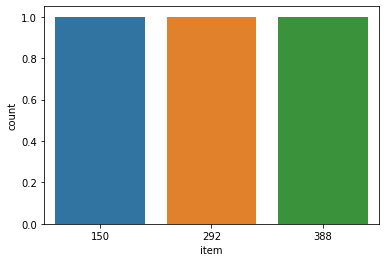

In [51]:
sb.countplot(p["item"].value_counts())

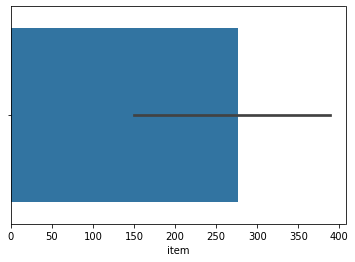

In [52]:
sb.barplot(p["item"].value_counts())

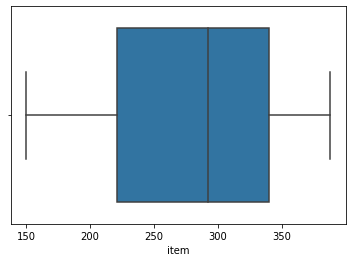

In [53]:
sb.boxplot(p["item"].value_counts())

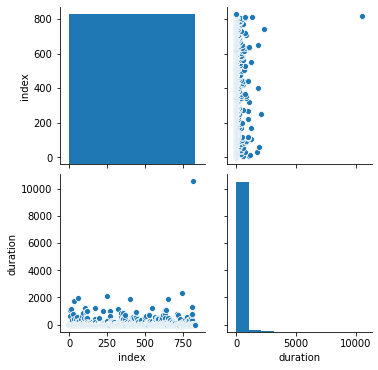

In [54]:
sb.pairplot(p)

In [176]:
# How many entries are there for each month?
p["month"].value_counts()

2014-11    230
2015-01    205
2014-12    157
2015-02    137
2015-03    101
Name: month, dtype: int64

In [177]:
# Number of non-null unique network entries
p["network"].nunique()

9

In [178]:
p["network"].unique()

array(['data', 'Vodafone', 'Meteor', 'Tesco', 'Three', 'voicemail',
       'landline', 'special', 'world'], dtype=object)

In [179]:
p["network"].value_counts()

Three        215
Vodafone     215
data         150
Meteor        87
Tesco         84
landline      42
voicemail     27
world          7
special        3
Name: network, dtype: int64

In [55]:
p.groupby("month").groups.keys()

dict_keys(['2014-11', '2014-12', '2015-01', '2015-02', '2015-03'])

In [182]:
p.groupby(["month"]).groups['2014-11']

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            220, 221, 222, 223, 224, 225, 226, 227, 229, 230],
           dtype='int64', length=230)

In [183]:
len(p.groupby(["month"]).groups['2014-11'])

230

In [184]:
# Get the first entry for each month

p.groupby("month").first()

,index,date,duration,item,network,network_type
month,,,,,,
2014-11,0,2014-10-15 06:58:00,34.429,data,data,data
2014-12,228,2014-11-13 06:58:00,34.429,data,data,data
2015-01,381,2014-12-13 06:58:00,34.429,data,data,data
2015-02,577,2015-01-13 06:58:00,34.429,data,data,data
2015-03,729,2015-02-12 20:15:00,69.000,call,landline,landline


In [185]:
# Get the last entry for each month
p.groupby("month").last()

,index,date,duration,item,network,network_type
month,,,,,,
2014-11,230,2014-11-13 22:31:00,1.000,sms,Vodafone,mobile
2014-12,388,2014-12-14 19:54:00,25.000,call,Three,mobile
2015-01,593,2015-01-14 23:36:00,1.000,sms,Three,mobile
2015-02,728,2015-02-12 06:58:00,34.429,data,data,data
2015-03,829,2015-03-14 00:16:00,1.000,sms,world,world


In [186]:
# Get the sum of the durations per month
p.groupby(["month"])["duration"].sum()

month
2014-11    26639.441
2014-12    14641.870
2015-01    18223.299
2015-02    15522.299
2015-03    22750.441
Name: duration, dtype: float64

In [187]:
p.groupby(["month" , "duration"])["duration"].sum()

month    duration
2014-11  1.0            95.0
         3.0            24.0
         4.0            56.0
         5.0            20.0
         6.0            12.0
                      ...   
2015-03  745.0         745.0
         768.0         768.0
         1325.0       1325.0
         2328.0       2328.0
         10528.0     10528.0
Name: duration, Length: 324, dtype: float64

In [188]:
p.groupby(["month" , "duration"]).sum()

index
month   duration       
2014-11 1.0       12587
        3.0         995
        4.0        1120
        5.0         445
        6.0         233
...                 ...
2015-03 745.0       807
        768.0       810
        1325.0      809
        2328.0      742
        10528.0     816

[324 rows x 1 columns]

In [62]:
# Get the number of dates / entries in each month

p.groupby("month")["date"].count()

month
2014-11    230
2014-12    157
2015-01    205
2015-02    137
2015-03    101
Name: date, dtype: int64

In [63]:
# What is the sum of durations, to each network
p.groupby("network")["duration"].sum()

network
Meteor        7233.00
Tesco        13841.00
Three        36551.00
Vodafone     14770.00
data          5164.35
landline     18433.00
special          3.00
voicemail     1775.00
world            7.00
Name: duration, dtype: float64

In [58]:
# What is the sum of durations, for calls only, to each network

p[p.item == "call"].groupby("network")["duration"].sum()

network
Meteor        7200.0
Tesco        13828.0
Three        36464.0
Vodafone     14621.0
landline     18433.0
voicemail     1775.0
Name: duration, dtype: float64

In [59]:
# get  total no of duration only, to each network , note: duration is object
p.groupby("network")["duration"].count()

network
Meteor        87
Tesco         84
Three        215
Vodafone     215
data         150
landline      42
special        3
voicemail     27
world          7
Name: duration, dtype: int64

In [60]:
# get  total no of call only, to each network 
p[p.item == "call"].groupby("network")["item"].count()

network
Meteor        54
Tesco         71
Three        128
Vodafone      66
landline      42
voicemail     27
Name: item, dtype: int64

In [61]:
p[p.item == "call"].count()

index           388
date            388
duration        388
item            388
month           388
network         388
network_type    388
dtype: int64

In [195]:
p.head()

,index,date,duration,item,month,network,network_type
0,0,2014-10-15 06:58:00,34.429,data,2014-11,data,data
1,1,2014-10-15 06:58:00,13.000,call,2014-11,Vodafone,mobile
2,2,2014-10-15 14:46:00,23.000,call,2014-11,Meteor,mobile
3,3,2014-10-15 14:48:00,4.000,call,2014-11,Tesco,mobile
4,4,2014-10-15 17:27:00,4.000,call,2014-11,Tesco,mobile


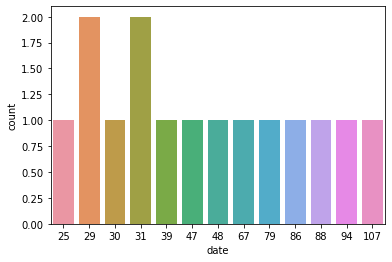

In [196]:
sb.countplot(p.groupby(['month', 'item'])['date'].count())

In [197]:
# How many calls, sms, and data entries are in each month?
p.groupby(['month', 'item'])['date'].count()

month    item
2014-11  call    107
         data     29
         sms      94
2014-12  call     79
         data     30
         sms      48
2015-01  call     88
         data     31
         sms      86
2015-02  call     67
         data     31
         sms      39
2015-03  call     47
         data     29
         sms      25
Name: date, dtype: int64

In [198]:
p.groupby(['month', 'item']).count()

index  date  duration  network  network_type
month   item                                              
2014-11 call    107   107       107      107           107
        data     29    29        29       29            29
        sms      94    94        94       94            94
2014-12 call     79    79        79       79            79
        data     30    30        30       30            30
        sms      48    48        48       48            48
2015-01 call     88    88        88       88            88
        data     31    31        31       31            31
        sms      86    86        86       86            86
2015-02 call     67    67        67       67            67
        data     31    31        31       31            31
        sms      39    39        39       39            39
2015-03 call     47    47        47       47            47
        data     29    29        29       29            29
        sms      25    25        25       25            25

In [199]:
# How many calls, texts, and data are sent per month, split by network_type?

p.groupby( [   "month" ,   "network_type"])[ "date"].count()


month    network_type
2014-11  data             29
         landline          5
         mobile          189
         special           1
         voicemail         6
2014-12  data             30
         landline          7
         mobile          108
         voicemail         8
         world             4
2015-01  data             31
         landline         11
         mobile          160
         voicemail         3
2015-02  data             31
         landline          8
         mobile           90
         special           2
         voicemail         6
2015-03  data             29
         landline         11
         mobile           54
         voicemail         4
         world             3
Name: date, dtype: int64

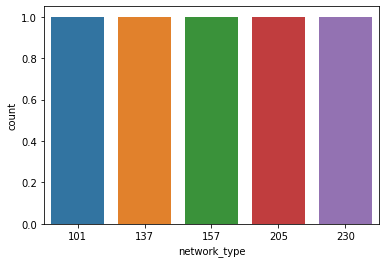

In [200]:
sb.countplot(p.groupby("month")["network_type" ].count())

In [201]:
p.groupby("month")["network_type" ].count()

month
2014-11    230
2014-12    157
2015-01    205
2015-02    137
2015-03    101
Name: network_type, dtype: int64

In [202]:
p.groupby("month")["network_type" , "date"].count()

,network_type,date
month,,
2014-11,230,230
2014-12,157,157
2015-01,205,205
2015-02,137,137
2015-03,101,101


In [203]:
p.groupby( [   "month" ,   "network_type"])["network_type" , "date"].count()

network_type  date
month   network_type                    
2014-11 data                    29    29
        landline                 5     5
        mobile                 189   189
        special                  1     1
        voicemail                6     6
2014-12 data                    30    30
        landline                 7     7
        mobile                 108   108
        voicemail                8     8
        world                    4     4
2015-01 data                    31    31
        landline                11    11
        mobile                 160   160
        voicemail                3     3
2015-02 data                    31    31
        landline                 8     8
        mobile                  90    90
        special                  2     2
        voicemail                6     6
2015-03 data                    29    29
        landline                11    11
        mobile                  54    54
        voicemail                4     4
        world                    3     3

In [204]:
p.groupby( [   "month" ,   "network_type"])[ "date"].count()

month    network_type
2014-11  data             29
         landline          5
         mobile          189
         special           1
         voicemail         6
2014-12  data             30
         landline          7
         mobile          108
         voicemail         8
         world             4
2015-01  data             31
         landline         11
         mobile          160
         voicemail         3
2015-02  data             31
         landline          8
         mobile           90
         special           2
         voicemail         6
2015-03  data             29
         landline         11
         mobile           54
         voicemail         4
         world             3
Name: date, dtype: int64

In [205]:
p.groupby( [   "month" ,   "network_type"])[ "month"].count()

month    network_type
2014-11  data             29
         landline          5
         mobile          189
         special           1
         voicemail         6
2014-12  data             30
         landline          7
         mobile          108
         voicemail         8
         world             4
2015-01  data             31
         landline         11
         mobile          160
         voicemail         3
2015-02  data             31
         landline          8
         mobile           90
         special           2
         voicemail         6
2015-03  data             29
         landline         11
         mobile           54
         voicemail         4
         world             3
Name: month, dtype: int64

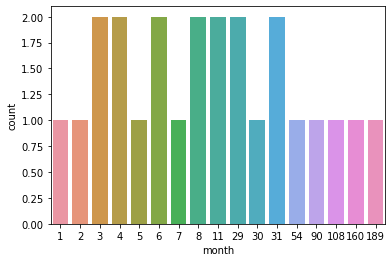

In [206]:
sb.countplot(p.groupby( [   "month" ,   "network_type"])[ "month"].count())

In [207]:
p.groupby( [   "month" ,   "network_type"]).count()

index  date  duration  item  network
month   network_type                                      
2014-11 data             29    29        29    29       29
        landline          5     5         5     5        5
        mobile          189   189       189   189      189
        special           1     1         1     1        1
        voicemail         6     6         6     6        6
2014-12 data             30    30        30    30       30
        landline          7     7         7     7        7
        mobile          108   108       108   108      108
        voicemail         8     8         8     8        8
        world             4     4         4     4        4
2015-01 data             31    31        31    31       31
        landline         11    11        11    11       11
        mobile          160   160       160   160      160
        voicemail         3     3         3     3        3
2015-02 data             31    31        31    31       31
        landline          8     8         8     8        8
        mobile           90    90        90    90       90
        special           2     2         2     2        2
        voicemail         6     6         6     6        6
2015-03 data             29    29        29    29       29
        landline         11    11        11    11       11
        mobile           54    54        54    54       54
        voicemail         4     4         4     4        4
        world             3     3         3     3        3

In [208]:
p.groupby( [   "month" ,   "network_type"])[ "network_type"].count()

month    network_type
2014-11  data             29
         landline          5
         mobile          189
         special           1
         voicemail         6
2014-12  data             30
         landline          7
         mobile          108
         voicemail         8
         world             4
2015-01  data             31
         landline         11
         mobile          160
         voicemail         3
2015-02  data             31
         landline          8
         mobile           90
         special           2
         voicemail         6
2015-03  data             29
         landline         11
         mobile           54
         voicemail         4
         world             3
Name: network_type, dtype: int64

# Gruupby : Series and Dataframe


In [209]:
print(      type(   p.groupby("month")     ["duration"].sum()        )  )

p.groupby("month")["duration"].sum()

<class 'pandas.core.series.Series'>


month
2014-11    26639.441
2014-12    14641.870
2015-01    18223.299
2015-02    15522.299
2015-03    22750.441
Name: duration, dtype: float64

In [210]:
print(       type(      p.groupby("month")     [     ["duration"]        ].sum()             )           )


print(type(p.groupby('month', as_index=False)["duration"].sum()))

# p.groupby("month")[     ["duration"]        ].sum().reset_index() 

#or
p.groupby('month', as_index=False)["duration"].sum()   #best way to use and easy

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


,month,duration
0,2014-11,26639.441
1,2014-12,14641.870
2,2015-01,18223.299
3,2015-02,15522.299
4,2015-03,22750.441


In [211]:
p.groupby('month', as_index=False).agg({"duration": "sum"}) # or above is also same


,month,duration
0,2014-11,26639.441
1,2014-12,14641.870
2,2015-01,18223.299
3,2015-02,15522.299
4,2015-03,22750.441


The groupby output will have an index or multi-index on rows corresponding to your chosen grouping variables.

To avoid setting this index, pass “as_index=False” to the groupby operation.

In [212]:
p.groupby('month', as_index=False)["duration"].sum()
#0r
# p.groupby("month")[     ["duration"]        ].sum().reset_index() 


,month,duration
0,2014-11,26639.441
1,2014-12,14641.870
2,2015-01,18223.299
3,2015-02,15522.299
4,2015-03,22750.441


# Multiple Statistics per Group  : use agg
The final piece of syntax that we’ll examine is the “agg()” function for Pandas.

The aggregation functionality provided by the agg() function allows multiple statistics to be calculated per group in one calculation.

In [221]:
# Group the data frame by month and item and extract a number of stats from each group


data.groupby(['month', 'item']).agg(
    {
         'duration':    sum,    # Sum duration per group
         'network_type': "count",  # get the count of networks
         'date': 'first'  # get the first date per group
    }
)


#note : sum or "sum"  both can use

duration  network_type            date
month   item                                         
2014-11 call  25547.000           107  15/10/14 06:58
        data    998.441            29  15/10/14 06:58
        sms      94.000            94  16/10/14 22:18
2014-12 call  13561.000            79  14/11/14 17:24
        data   1032.870            30  13/11/14 06:58
        sms      48.000            48  14/11/14 17:28
2015-01 call  17070.000            88  15/12/14 20:03
        data   1067.299            31  13/12/14 06:58
        sms      86.000            86  15/12/14 19:56
2015-02 call  14416.000            67  15/01/15 10:36
        data   1067.299            31  13/01/15 06:58
        sms      39.000            39  15/01/15 12:23
2015-03 call  21727.000            47  12/02/15 20:15
        data    998.441            29  13/02/15 06:58
        sms      25.000            25  19/02/15 18:46

In [222]:
data.groupby(['month', 'item']).agg(
    {
         'duration':"sum",    # Sum duration per group
         'network_type': "count",  # get the count of networks
         'date': 'first'  # get the first date per group
    }
)

duration  network_type            date
month   item                                         
2014-11 call  25547.000           107  15/10/14 06:58
        data    998.441            29  15/10/14 06:58
        sms      94.000            94  16/10/14 22:18
2014-12 call  13561.000            79  14/11/14 17:24
        data   1032.870            30  13/11/14 06:58
        sms      48.000            48  14/11/14 17:28
2015-01 call  17070.000            88  15/12/14 20:03
        data   1067.299            31  13/12/14 06:58
        sms      86.000            86  15/12/14 19:56
2015-02 call  14416.000            67  15/01/15 10:36
        data   1067.299            31  13/01/15 06:58
        sms      39.000            39  15/01/15 12:23
2015-03 call  21727.000            47  12/02/15 20:15
        data    998.441            29  13/02/15 06:58
        sms      25.000            25  19/02/15 18:46

In [215]:
# # Define the aggregation procedure outside of the groupby operation
# aggregations = {
#     'duration':'sum',
#     'date': lambda x: max(x) - 1
# }
# p.groupby('month').agg(aggregations)


#error, check later

In [216]:
# Group the data frame by month and item and extract a number of stats from each group
p.groupby(
    ['month', 'item']
).agg(
    {
        # Find the min, max, and sum of the duration column
        'duration': [min, max, sum],
        # find the number of network type entries
        'network_type': "count",
        # minimum, first, and number of unique dates
        'date': [min, 'first', 'nunique']
    }
)

duration                       network_type                date  \
                  min        max        sum        count                 min   
month   item                                                                   
2014-11 call    1.000   1940.000  25547.000          107 2014-10-15 06:58:00   
        data   34.429     34.429    998.441           29 2014-10-15 06:58:00   
        sms     1.000      1.000     94.000           94 2014-10-16 22:18:00   
2014-12 call    2.000   2120.000  13561.000           79 2014-11-14 17:24:00   
        data   34.429     34.429   1032.870           30 2014-11-13 06:58:00   
        sms     1.000      1.000     48.000           48 2014-11-14 17:28:00   
2015-01 call    2.000   1859.000  17070.000           88 2014-12-15 20:03:00   
        data   34.429     34.429   1067.299           31 2014-12-13 06:58:00   
        sms     1.000      1.000     86.000           86 2014-12-15 19:56:00   
2015-02 call    1.000   1863.000  14416.000           67 2015-01-15 10:36:00   
        data   34.429     34.429   1067.299           31 2015-01-13 06:58:00   
        sms     1.000      1.000     39.000           39 2015-01-15 12:23:00   
2015-03 call    2.000  10528.000  21727.000           47 2015-02-12 20:15:00   
        data   34.429     34.429    998.441           29 2015-02-13 06:58:00   
        sms     1.000      1.000     25.000           25 2015-02-19 18:46:00   

                                          
                           first nunique  
month   item                              
2014-11 call 2014-10-15 06:58:00     104  
        data 2014-10-15 06:58:00      29  
        sms  2014-10-16 22:18:00      79  
2014-12 call 2014-11-14 17:24:00      76  
        data 2014-11-13 06:58:00      30  
        sms  2014-11-14 17:28:00      41  
2015-01 call 2014-12-15 20:03:00      84  
        data 2014-12-13 06:58:00      31  
        sms  2014-12-15 19:56:00      58  
2015-02 call 2015-01-15 10:36:00      67  
        data 2015-01-13 06:58:00      31  
        sms  2015-01-15 12:23:00      27  
2015-03 call 2015-02-12 20:15:00      47  
        data 2015-02-13 06:58:00      29  
        sms  2015-02-19 18:46:00      17

In [217]:
# Grouping with named aggregation using new Pandas 0.25 syntax. 
# Tuples are used to specify the columns to work on and the functions to apply to each grouping.



p[p['item'] == 'call'].groupby('month').agg(
    # Get max of the duration column for each group
    max_duration=('duration', max),
    # Get min of the duration column for each group
    min_duration=('duration', min),
    # Get sum of the duration column for each group
    total_duration=('duration', sum),
    # Apply a lambda to date column
    num_days=("date", lambda x: (max(x) - min(x)).days)    
)

,max_duration,min_duration,total_duration,num_days
month,,,,
2014-11,1940.0,1.0,25547.0,28
2014-12,2120.0,2.0,13561.0,30
2015-01,1859.0,2.0,17070.0,30
2015-02,1863.0,1.0,14416.0,25
2015-03,10528.0,2.0,21727.0,19


In [218]:
# For clearer naming, Pandas also provides the NamedAggregation named-tuple, 
# which can be used to achieve the same as normal tuples:



p[p['item'] == 'call'].groupby('month').agg(
    max_duration=pd.NamedAgg(column='duration', aggfunc=max),
    min_duration=pd.NamedAgg(column='duration', aggfunc=min),
    total_duration=pd.NamedAgg(column='duration', aggfunc=sum),
    num_days=pd.NamedAgg(
        column="date", 
        aggfunc=lambda x: (max(x) - min(x)).days)    
)

,max_duration,min_duration,total_duration,num_days
month,,,,
2014-11,1940.0,1.0,25547.0,28
2014-12,2120.0,2.0,13561.0,30
2015-01,1859.0,2.0,17070.0,30
2015-02,1863.0,1.0,14416.0,25
2015-03,10528.0,2.0,21727.0,19


In [223]:
#One option is to drop the top level (using .droplevel) of the newly created multi-index on columns using:




grouped = data.groupby('month').agg({"duration" : [min, max ] })

grouped.columns = grouped.columns.droplevel(level=0)
grouped.rename(columns={
    "min": "min_duration", "max": "max_duration", "mean": "mean_duration"
})
grouped.head()

,min,max
month,,
2014-11,1.0,1940.0
2014-12,1.0,2120.0
2015-01,1.0,1859.0
2015-02,1.0,1863.0
2015-03,1.0,10528.0


In [265]:
data.groupby('month').agg(   {"duration": [min, max]    }) 

duration         
             min      max
month                    
2014-11      1.0   1940.0
2014-12      1.0   2120.0
2015-01      1.0   1859.0
2015-02      1.0   1863.0
2015-03      1.0  10528.0

In [267]:
grouped = data.groupby('month').agg(   {"duration": [min, max]    }) 


# Using ravel, and a string join, we can create better names for the columns:
grouped.columns = ["_".join(x) for x in grouped.columns.ravel()]

grouped


,duration_min,duration_max
month,,
2014-11,1.0,1940.0
2014-12,1.0,2120.0
2015-01,1.0,1859.0
2015-02,1.0,1863.0
2015-03,1.0,10528.0
